# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [DIllan]
- **Email:** [www.drawart@gmail.com]
- **ID Dicoding:** [dillan_engelbert
]

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

2. Distribusi Penjualan Berdasarkan Jenis Pembayaran

# ---------------------------------RFM Analysis-----------------------------------

3. **Recency:** Berapa bulan sejak terakhir pelanggan melakukan pembelian jika tanggal saat ini 31 ini Oktober 2018?

4. **Frequency:** Seberapa sering pelanggan melakukan pembelian hingga 31 Oktober 2018?

5. **Monetary:** Berapa total pengeluaran pelanggan teratas  hingga 31 Oktober 2018?


# ------------------------------Geospatial Analysis-------------------------------

6. Kota atau negara bagian mana yang memiliki jumlah pelanggan unik terbanyak berdasarkan lokasi penjual?

7. Negara bagian mana yang memiliki nilai penjualan (total payment_value) tertinggi dan terendah?

8. Apakah ada kategori produk tertentu yang memiliki nilai penjualan tertinggi di tiap negara bagian?



# ---------------------------------Clustering------------------------------------

9. Berdasarkan data yang tersedia, apa kriteria pengelompokan yang paling relevan untuk bisnis yang bisa mengelompokkan pelanggan ke dalam kategori seperti VIP, Reguler, dan Pendatang Baru?




## Import Semua Packages/Library yang Digunakan

In [2]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import geopandas as gpd
import folium
from contextily import Place
import contextily as ctx

%matplotlib inline

## Data Wrangling

### Gathering Data

In [3]:
df_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
df_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("data/olist_customers_dataset.csv")
df_category = pd.read_csv("data/product_category_name_translation.csv")

In [4]:
dataframes = {
    "Items": df_items,
    "Reviews": df_reviews,
    "Orders": df_orders,
    "Products": df_products,
    "Geolocation": df_geolocation,
    "Sellers": df_sellers,
    "Payments": df_payments,
    "Customers": df_customers,
    "Category": df_category
}

for name, df in dataframes.items():
    print(f"--- {name} ---")
    display(df.head())


--- Items ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


--- Reviews ---


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


--- Orders ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


--- Products ---


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


--- Geolocation ---


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


--- Sellers ---


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


--- Payments ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


--- Customers ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


--- Category ---


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Pelanggan paling banyak menggunakan paymen_type "credit_card"
- Pelanggan banyak yang tidak meninggalkan comment title maupun message

### Assessing Data

In [5]:
print("--Items--")
df_items.info()
print("\n--reviews--")
df_reviews.info()
print("\n--orders--")
df_orders.info()
print("\n--products--")
df_products.info()
print("\n--geolocation--")
df_geolocation.info()
print("\n--sellers--")
df_sellers.info()
print("\n--payments--")
df_payments.info()
print("\n--customers--")
df_customers.info()
print("\n--category--")
df_category.info()

--Items--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

--reviews--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score         

In [6]:
duplicate_counts = {
    'df_items': df_items.duplicated().sum(),
    'df_reviews': df_reviews.duplicated().sum(),
    'df_orders': df_orders.duplicated().sum(),
    'df_products': df_products.duplicated().sum(),
    'df_geolocation': df_geolocation.duplicated().sum(),
    'df_sellers': df_sellers.duplicated().sum(),
    'df_payments': df_payments.duplicated().sum(),
    'df_customers': df_customers.duplicated().sum()
}

pd.DataFrame(list(duplicate_counts.items()), columns=['DataFrame', 'Duplicate Count'])


,DataFrame,Duplicate Count
0,df_items,0
1,df_reviews,0
2,df_orders,0
3,df_products,0
4,df_geolocation,261831
5,df_sellers,0
6,df_payments,0
7,df_customers,0


**Insight:**

***Item:***

-shipping_limit_date object sebaiknya diubah ke datetime

***Reviews:***

-review_comment_title, review_comment_message banyak nilai yang hilang

***Order:***

-order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date sebaiknya diubah ke datetime dan ada nilai yang hilang

***Product:***

-product_category_name banyak nilai yang hilang

-product_name_length, product_description_length tidak diperlukan

***geolocation:***

-memiliki banyak duplikasi data







### Cleaning Data

# ITEMS
Melalui loop, setiap kolom di dalam datetime_columns diubah menjadi tipe datetime menggunakan fungsi pd.to_datetime().

In [7]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  df_items[column] = pd.to_datetime(df_items[column])
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Di bagian ini, dilakukan analisis deskriptif pada kolom order_item_id, shipping_limit_date, price, dan freight_value untuk memahami karakteristik data dalam df_items. Hasilnya menunjukkan bahwa sebagian besar pesanan hanya memiliki satu item, meskipun ada yang mencapai hingga 21 item. Kolom shipping_limit_date memiliki rentang waktu dari tahun 2016 hingga 2020, dengan rata-rata berada di awal tahun 2018. Harga item bervariasi dari IDR 0.85 hingga IDR 6735, dengan rata-rata sekitar IDR 120.65, sementara biaya pengiriman berkisar dari IDR 0 hingga IDR 409.68, dengan rata-rata IDR 19.99. Harga item maupun harga pengiriman maksimum memiliki angka yang jauh dari outlier. Analisis ini memberikan gambaran umum distribusi nilai pada setiap kolom, membantu memahami rentang dan rata-rata setiap data.

In [8]:
df_items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [9]:
pd.merge(df_products, df_items, on='product_id', how='inner')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28


# REVIEWS

In [10]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


comment title maupun comment message memiliki banyak nilai yang hilang, ini disebabkan oleh pelanggan yang tidak mengisi review. Sehingga review dengan nilai yang hilang dapat diganti dengan No title mapun No message

In [11]:
df_reviews['review_comment_title'] = df_reviews['review_comment_title'].fillna('No title')
df_reviews['review_comment_message'] = df_reviews['review_comment_message'].fillna('No message')
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No title,No message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No title,No message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No title,No message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No title,No message,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No title,No message,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No title,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No title,No message,2018-07-01 00:00:00,2018-07-02 12:59:13


Mengahpus nilai duplikasi

In [12]:
df_reviews.duplicated().sum()

np.int64(0)

In [13]:
df_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# ORDER

Pada bagian ini, kolom-kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date diubah ke dalam format datetime menggunakan fungsi pd.to_datetime(). Langkah ini diperlukan untuk memastikan bahwa data dalam kolom-kolom tersebut dikenali sebagai data waktu, sehingga memudahkan analisis terkait waktu, seperti menghitung durasi pengiriman, membandingkan waktu aktual dengan waktu estimasi, dan mengidentifikasi tren waktu lainnya dalam proses pesanan.

In [14]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [15]:
df_orders[df_orders['order_approved_at'].isna()| df_orders['order_delivered_carrier_date'].isna() | df_orders['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Menghapus nilai order status "unavailable" dan "canceled" yang tidak dibutuhkan dalam pertanyaan bisnis

In [16]:
df_orders = df_orders[~df_orders['order_status'].isin(['unavailable', 'canceled'])]
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98188 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


# PRODUCT
Menghapus kolom 'product_name_lenght' dan 'product_description_lenght' karena tidak memiliki nilai bisnis dan tidak dibutuhkan dalam pertanyaan bisnis serta memiliki pengejaan yang salah


In [17]:
df_products.drop(columns=['product_name_lenght', 'product_description_lenght'], inplace=True)
df_products

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,700.0,31.0,13.0,20.0


Menghapus kolom product_ccategory_name yang memiliki nilai yang hilang

In [18]:
df_products.dropna(subset=['product_category_name'], inplace=True)
df_products['product_category_name'].isna().sum()

np.int64(0)

# GEOLOCATION
Menghilangkan baris duplikasi pada geolokasi karena dataset geolokasi hanya membutuhkan 1 baris unik untuk mengarah pada data seller maupun customer, menunjukkan lokasi dataset lain

In [19]:
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.duplicated().sum()

np.int64(0)

In [20]:
df_seller_geolocation = df_sellers.merge(df_geolocation, left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix' ,how='inner')
df_customer_geolocation = df_customers.merge(df_geolocation, left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='inner')

**Insight:**
- Penggantian nilai yang hilang pada kolom judul dan komentar ulasan dengan "No title" dan "No comment" dapat mempertahankan integritas dataset tanpa kehilangan informasi berharga.
- mengabaikan product_name_length dan product_description_length yang tidak relevan dan salah pengejaan membantu memperjelas fokus analisis Anda dan menghindari kompleksitas yang tidak perlu
-Melakukan encoding pada variabel kategorikal, seperti kategori produk, ini dapat mengungkap pola atau tren dalam preferensi konsumen yang dapat digunakan untuk pengambilan keputusan strategis
-Proses pembersihan mungkin juga membantu dalam mengidentifikasi nilai yang tidak biasa outliers  dalam data
-Data yang sudah dibersihkan lebih siap untuk visualisasi.

## Exploratory Data Analysis (EDA)

### Explore ...

MERGE

Menggabungkan semua dataset menjadi satu agar lebih mudah mengetahui korelasi dan query


In [21]:
df_all = df_orders.merge(df_items, on='order_id', how='inner')
df_all = df_all.merge(df_payments, on='order_id', how='inner', validate='m:m')
df_all = df_all.merge(df_reviews, on='order_id', how='inner')
df_all = df_all.merge(df_products, on='product_id', how='inner')
df_all = df_all.merge(df_customers, on='customer_id', how='inner')
df_all = df_all.merge(df_sellers, on='seller_id', how='inner')
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,40.0,10.0,40.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,17602,tupa,SP
115085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,32.0,90.0,22.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,8290,sao paulo,SP
115086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG
115087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,20.0,20.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,37175,ilicinea,MG


menghapus kolom-kolom tertentu dari DataFrame df_all jika kolom tersebut ada, kemudian membuat fitur baru berdasarkan kolom order_purchase_timestamp, termasuk hari dalam seminggu (sebagai variabel kategorikal), jam, bulan, tahun, dan periode bulanan. Selain itu, kode ini juga menghitung waktu pengiriman dalam hari dengan mencari selisih antara tanggal pengiriman dan waktu pembelian, mengonversi durasi ini dari detik ke hari, dan membulatkan hasilnya.

In [22]:
columns_to_drop = ['day_in_week', 'hour', 'month', 'year', 'date', 'delivery_time']
for column in columns_to_drop:
    if column in df_all.columns:
        df_all = df_all.drop(columns=column)

df_all['day_in_week'] = df_all['order_purchase_timestamp'].dt.weekday + 1

df_all['day_in_week'] = df_all['day_in_week'].astype('category')

df_all['hour'] = df_all['order_purchase_timestamp'].dt.hour

df_all['month'] = df_all['order_purchase_timestamp'].dt.month

df_all['year'] = df_all['order_purchase_timestamp'].dt.year

df_all['date'] = df_all['order_purchase_timestamp'].dt.to_period('M')

delivery_time = df_all['order_delivered_customer_date'] - df_all['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
df_all["delivery_time"] = round(delivery_time/86400)
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,day_in_week,hour,month,year,date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,9350,maua,SP,1,10,10,2017,2017-10,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,9350,maua,SP,1,10,10,2017,2017-10,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,9350,maua,SP,1,10,10,2017,2017-10,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,BA,31570,belo horizonte,SP,2,20,7,2018,2018-07,14.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,GO,14840,guariba,SP,3,8,8,2018,2018-08,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,17602,tupa,SP,2,12,2,2018,2018-02,22.0
115085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,BA,8290,sao paulo,SP,7,14,8,2017,2017-08,25.0
115086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,37175,ilicinea,MG,1,21,1,2018,2018-01,17.0
115087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,37175,ilicinea,MG,1,21,1,2018,2018-01,17.0


In [23]:
df_all.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,hour,month,year,delivery_time
count,115089,115075,114369,113225,115089,115089.000000,115089,115089.000000,115089.000000,115089.000000,...,115088.000000,115088.000000,115088.000000,115088.000000,115089.000000,115089.000000,115089.000000,115089.000000,115089.000000,113225.000000
mean,2017-12-31 09:03:20.182450176,2017-12-31 20:29:06.889393664,2018-01-04 06:23:05.655877120,2018-01-13 18:21:51.471362304,2018-01-24 05:56:22.853270016,1.194015,2018-01-07 00:15:49.375266560,120.343100,20.056815,1.093727,...,2114.100280,30.307912,16.630222,23.110550,35092.804238,24522.859735,14.764999,6.033331,2017.539652,12.400768
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,2016-10-08 10:34:01,0.850000,0.000000,1.000000,...,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,0.000000,1.000000,2016.000000,1.000000
25%,2017-09-12 14:51:37,2017-09-12 23:37:49.500000,2017-09-15 17:13:34,2017-09-25 18:23:03,2017-10-03 00:00:00,1.000000,2017-09-19 14:55:24,39.900000,13.080000,1.000000,...,300.000000,18.000000,8.000000,15.000000,11320.000000,6429.000000,11.000000,3.000000,2017.000000,7.000000
50%,2018-01-19 07:09:20,2018-01-19 14:57:25,2018-01-23 23:26:35,2018-02-02 02:31:50,2018-02-15 00:00:00,1.000000,2018-01-25 19:49:24,74.900000,16.320000,1.000000,...,700.000000,25.000000,13.000000,20.000000,24320.000000,13690.000000,15.000000,6.000000,2018.000000,10.000000
75%,2018-05-04 16:54:19,2018-05-05 02:53:44.500000,2018-05-08 13:21:00,2018-05-15 20:08:00,2018-05-28 00:00:00,1.000000,2018-05-10 14:15:29,134.490000,21.220000,1.000000,...,1800.000000,38.000000,20.000000,30.000000,58865.000000,28605.000000,19.000000,8.000000,2018.000000,16.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,29.000000,...,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000,23.000000,12.000000,2018.000000,208.000000
std,NaN,NaN,NaN,NaN,NaN,0.684941,NaN,181.528441,15.823733,0.730212,...,3781.519142,16.211377,13.463231,11.747676,29844.689518,27642.125745,5.321825,3.223732,0.504647,9.358445


mengelompokkan data dalam DataFrame df_all berdasarkan periode bulanan dari kolom order_purchase_timestamp, lalu menghitung total penjualan dengan menjumlahkan nilai price untuk setiap bulan. Hasilnya adalah DataFrame monthly_sales yang menampilkan total penjualan per bulan.

In [24]:
monthly_sales = df_all.groupby(df_all['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})
monthly_sales

,price
order_purchase_timestamp,
2016-09,72.89
2016-10,45206.22
2016-12,10.90
2017-01,126671.82
2017-02,248081.31
2017-03,379004.11
2017-04,374046.24
2017-05,529694.55
2017-06,445360.16



mengelompokkan data dalam DataFrame df_all berdasarkan jenis pembayaran (payment_type) dan menghitung total penjualan dengan menjumlahkan nilai price untuk setiap jenis pembayaran. Hasilnya adalah objek sales_by_payment yang menunjukkan total penjualan yang diperoleh dari masing-masing jenis pembayaran yang digunakan.

In [25]:
sales_by_payment = df_all.groupby('payment_type')['price'].sum()
sales_by_payment

payment_type
boleto          2330438.65
credit_card    10706082.40
debit_card       178599.36
voucher          635046.63
Name: price, dtype: float64


Kode tersebut menghitung jumlah bulan sejak pembelian terakhir untuk setiap entri dalam DataFrame df_all berdasarkan tanggal saat ini yang ditentukan sebagai '2018-10-31'. Pertama, selisih hari antara tanggal saat ini dan order_purchase_timestamp dihitung, kemudian hasilnya dibagi 30 untuk mendapatkan estimasi jumlah bulan sejak pembelian terakhir. Selanjutnya, DataFrame dikelompokkan berdasarkan kolom month_last_purchase, dan jumlah pelanggan unik (customer_id) dihitung untuk setiap kelompok. Hasil akhirnya menunjukkan jumlah pelanggan unik berdasarkan berapa lama sejak mereka melakukan pembelian terakhir.

In [26]:
today = pd.to_datetime('2018-10-31')

last_purchase = (today - df_all['order_purchase_timestamp']).dt.days

df_all['month_last_purchase'] = last_purchase//30
df_all.groupby('month_last_purchase').customer_id.nunique().sort_values(ascending=False)

month_last_purchase
11    7811
8     6997
6     6925
9     6907
7     6742
5     6247
4     6124
3     6102
2     6066
10    4869
13    4215
12    4179
14    4039
15    3865
17    3464
16    3126
18    2559
19    2451
20    1866
21    1215
25     283
22      47
1        1
26       1
Name: customer_id, dtype: int64


Kode tersebut menghitung frekuensi pembelian untuk setiap pelanggan dalam DataFrame df_all dalam lima bulan terakhir dari tanggal saat ini ('2018-10-31'). frequency berisi jumlah pembelian yang dilakukan oleh setiap pelanggan dalam lima bulan terakhir, diurutkan dari yang terbanyak ke yang paling sedikit.

In [27]:

frequency = df_all[df_all['order_purchase_timestamp'] <= today].groupby('customer_id').size().reset_index(name='frequency').sort_values(by='frequency', ascending=False)

frequency

,customer_id,frequency
14740,270c23a11d024a44c896d1894b261a83,63
7355,13aa59158da63ba0e93ec6ac2c07aacb,38
58204,9af2372a1e49340278e7c1ef8d749f34,29
55071,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
79170,d22f25a9fadfb1abbc2e29395b1239f4,24
...,...,...
19,0010068a73b7c56da5758c3f9e5c7375,1
20,001028b78fd413e19704b3867c369d3a,1
96085,fff4fdd0de70a51d4e0f57a4c1c6bfae,1
96086,fff5169e583fd07fac9fec88962f189d,1


menghitung total nilai pembelian (payment_value) untuk setiap pelanggan dalam DataFrame df_all selama lima bulan terakhir dari tanggal saat ini ('2018-10-31'). Hasilnya diurutkan dalam urutan menurun, dan variabel monetary berisi total nilai pembelian yang dilakukan oleh setiap pelanggan dalam periode tersebut, diurutkan dari yang tertinggi ke terendah.

In [28]:
monetary = df_all[df_all['order_purchase_timestamp'] <= today].groupby('customer_id')['payment_value'].sum()
monetary.sort_values(ascending=False)

customer_id
1617b1357756262bfa56ab541c47bc16    109312.64
be1b70680b9f9694d8c70f41fa3dc92b     44048.00
05455dfa7cd02f13d132aa7a6a9729c6     36489.24
1ff773612ab8934db89fd5afa8afe506     30186.00
ec5b2ba62e574342386871631fafd3fc     29099.52
                                      ...    
d2c63ad286e3ca9dd69218008d61ff81        11.62
046f890135acc703faff4c1fc0c2d73c        11.56
8e4bd65db637116b6b68109e4df21b84        10.89
184e8e8e48937145eb96c721ef1f0747        10.07
a790343ca6f3fee08112d678b43aa7c5         9.59
Name: payment_value, Length: 96101, dtype: float64

menggabungkan data frekuensi dan nilai pembayaran berdasarkan customer_id, kemudian menemukan dan menampilkan informasi tentang pelanggan dengan frekuensi pembelian tertinggi serta pelanggan dengan nilai pembayaran tertinggi, termasuk ID pelanggan, frekuensi, dan total nilai pembayaran mereka.

In [29]:
combined_df = pd.merge(frequency, monetary, on='customer_id')

max_frequency_row = combined_df.loc[combined_df['frequency'].idxmax()]

max_payment_row = combined_df.loc[combined_df['payment_value'].idxmax()]

print("Customer with Highest Frequency:")
print(f"Customer ID: {max_frequency_row['customer_id']}, Frequency: {max_frequency_row['frequency']}, Total Payment Value: {max_frequency_row['payment_value']}")

print("\nCustomer with Highest Payment Value:")
print(f"Customer ID: {max_payment_row['customer_id']}, Total Payment Value: {max_payment_row['payment_value']}, Frequency: {max_payment_row['frequency']}")

Customer with Highest Frequency:
Customer ID: 270c23a11d024a44c896d1894b261a83, Frequency: 63, Total Payment Value: 483.96

Customer with Highest Payment Value:
Customer ID: 1617b1357756262bfa56ab541c47bc16, Total Payment Value: 109312.64, Frequency: 8


menghitung jumlah penjual unik (customer_id) berdasarkan kota penjual (seller_city) dalam DataFrame df_all.

In [30]:
city_seller_counts=df_all.groupby(by="seller_city").customer_id.nunique().sort_values(ascending=False).reset_index()
city_seller_counts

,seller_city,customer_id
0,sao paulo,24099
1,ibitinga,6464
2,santo andre,2679
3,curitiba,2669
4,belo horizonte,2310
...,...,...
592,guaratingueta,1
593,abadia de goias,1
594,tres coroas,1
595,tocantins,1


menghitung jumlah pelanggan unik (customer_id) berdasarkan provinsi penjual (seller_state) dalam DataFrame df_all.

In [31]:
state_customer_counts=df_all.groupby(by="seller_state").customer_id.nunique().sort_values(ascending=False).reset_index()
state_customer_counts

,seller_state,customer_id
0,SP,68323
1,MG,7654
2,PR,7540
3,RJ,4218
4,SC,3610
5,RS,1927
6,DF,811
7,BA,565
8,GO,447
9,PE,402


menghitung total nilai penjualan (payment_value) berdasarkan provinsi penjual (seller_state) dalam DataFrame df_all

In [32]:
state_sales = df_all.groupby('seller_state')['payment_value'].sum().sort_values(ascending=False).reset_index()
state_sales

,seller_state,payment_value
0,SP,13015159.75
1,PR,1812888.78
2,MG,1513003.08
3,RJ,1068413.97
4,SC,860365.91
5,RS,550421.83
6,BA,365752.85
7,DF,135059.05
8,PE,122593.60
9,GO,109920.80


 menghitung total nilai penjualan (payment_value) berdasarkan kombinasi provinsi penjual (seller_state) dan kategori produk (product_category_name) dalam DataFrame df_all.

In [33]:
category_state_sales = df_all.groupby(by=["seller_state", "product_category_name"]).agg({
    "payment_value": "sum"
}).reset_index().sort_values(by="payment_value", ascending=False)
category_state_sales

,seller_state,product_category_name,payment_value
440,SP,cama_mesa_banho,1516750.60
493,SP,relogios_presentes,1095220.99
481,SP,moveis_decoracao,1049792.62
438,SP,beleza_saude,948465.35
459,SP,esporte_lazer,835629.69
...,...,...,...
79,ES,eletronicos,44.28
136,MG,cine_foto,42.72
125,MG,artes_e_artesanato,33.69
90,ES,telefonia,32.10



membuat ringkasan untuk setiap pelanggan dalam DataFrame df_all, dengan menghitung total pengeluaran (total_spent), frekuensi pembelian (purchase_frequency), dan tanggal pembelian pertama (first_purchase_date) untuk setiap customer_id. Setelah itu, tanggal pembelian pertama diubah menjadi format datetime.

Kemudian, kriteria untuk mengategorikan pelanggan ditetapkan sebagai berikut:

1. VIP: Pelanggan dengan frekuensi pembelian lebih dari 2 dan total pengeluaran lebih dari kuartil ketiga (Q3).
2. Reguler: Pelanggan dengan frekuensi pembelian antara 1 dan 2, serta total pengeluaran antara kuartil kedua (Q2) dan kuartil ketiga (Q3).
3. Pendatang Baru: Pelanggan yang melakukan pembelian pertama dalam 30 hari terakhir dari tanggal '2018-10-31'.

In [34]:
customer_summary = df_all.groupby('customer_id').agg(
    total_spent=('payment_value', 'sum'),
    purchase_frequency=('order_delivered_customer_date', 'count'),
    first_purchase_date=('order_purchase_timestamp', 'min')
).reset_index()


customer_summary['first_purchase_date'] = pd.to_datetime(customer_summary['first_purchase_date'])

X = 2
Z = df_all['payment_value'].quantile(0.75)
A = 1
B = 2
W = df_all['payment_value'].quantile(0.5)
N = 30


VIP_criteria = (customer_summary['purchase_frequency'] > X) & (customer_summary['total_spent'] > Z)
Regular_criteria = (customer_summary['purchase_frequency'].between(A, B)) & (customer_summary['total_spent'].between(W, Z))
New_customer_criteria = (pd.to_datetime('2018-10-31') - customer_summary['first_purchase_date']).dt.days < N


customer_summary['category'] = 'Pendatang Baru'
customer_summary.loc[VIP_criteria, 'category'] = 'VIP'
customer_summary.loc[Regular_criteria, 'category'] = 'Reguler'
customer_summary.loc[New_customer_criteria, 'category'] = 'Pendatang Baru'

df_all = df_all.merge(customer_summary[['customer_id', 'category']], on='customer_id', how='left')

df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,day_in_week,hour,month,year,date,delivery_time,month_last_purchase,category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,10,10,2017,2017-10,8.0,13,Pendatang Baru
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,10,10,2017,2017-10,8.0,13,Pendatang Baru
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,10,10,2017,2017-10,8.0,13,Pendatang Baru
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,2,20,7,2018,2018-07,14.0,3,Reguler
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,3,8,8,2018,2018-08,9.0,2,Reguler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115084,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,tupa,SP,2,12,2,2018,2018-02,22.0,8,Pendatang Baru
115085,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,sao paulo,SP,7,14,8,2017,2017-08,25.0,14,Pendatang Baru
115086,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,ilicinea,MG,1,21,1,2018,2018-01,17.0,9,Pendatang Baru
115087,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,ilicinea,MG,1,21,1,2018,2018-01,17.0,9,Pendatang Baru


In [35]:
df_all.groupby('category').customer_id.nunique()

category
Pendatang Baru    70840
Reguler           22795
VIP                2466
Name: customer_id, dtype: int64

**Insight:**
- banyak pelanggan tidak melakukan pembelian dalam waktu lama rata-rata 9 bulan sejak saat ini 31 Oktober 2018 , ini bisa menjadi sinyal untuk merancang kampanye pemasaran yang mendorong mereka untuk kembali.
-fokus pada pelanggan dengan frekuensi tinggi dan pengeluaran tinggi dapat lebih meningkatkan revenue dibandingkan dengan pelanggan yang jarang bertransaksi (saat ini frekuensi tertinggi ada pada 63 dengan total pengeluaran 483.96 dan pengeluaran tertinggi 109312.64 dengan frekuensi 8)
- Menghitung total pengeluaran dari pelanggan teratas memberikan wawasan tentang kontribusi mereka terhadap revenue perusahaan
-Memahami distribusi lokasi danjumlah penjual di berbagai kota dan negara bagian dengan pelanggan/ order terbanyak membantu menentukan area dengan potensi pasar yang lebih besar.
- Dengan mengelompokkan pelanggan ke dalam kategori seperti VIP, Reguler, dan Pendatang Baru membantu dalam merancang strategi pemasaran yang ditargetkan untuk setiap kelompok

## Visualization & Explanatory Analysis

### Pertanyaan 1:

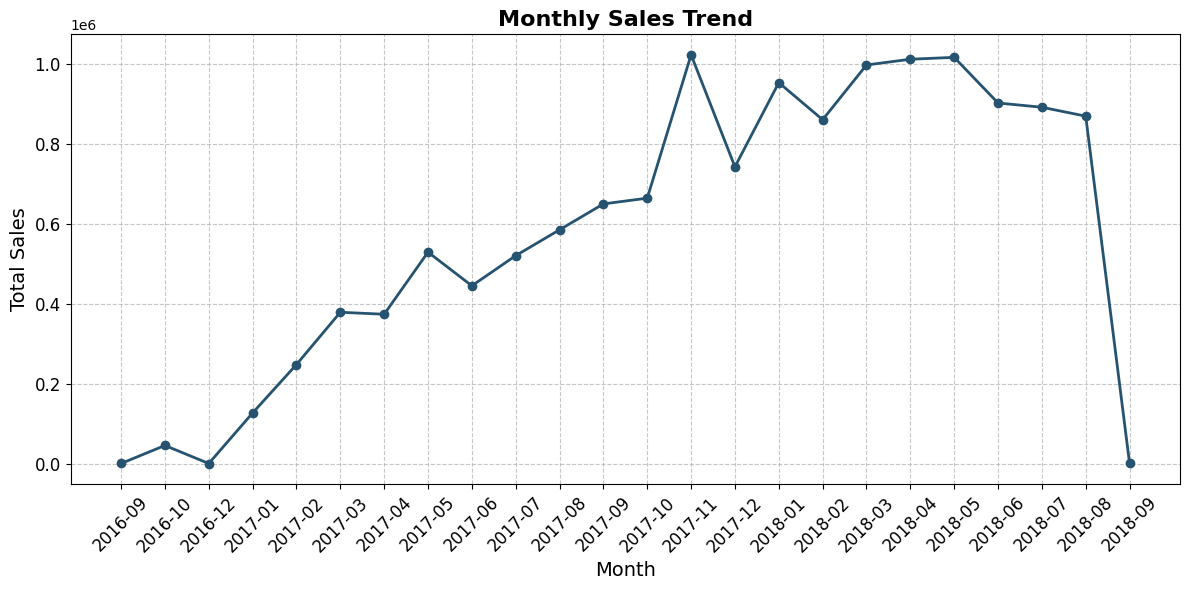

In [36]:
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)

plt.figure(figsize=(12, 6))


plt.plot(monthly_sales.index.astype(str), monthly_sales['price'],
         marker='o', linestyle='-', color=colors[0], linewidth=2)


plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Pertanyaan 2:

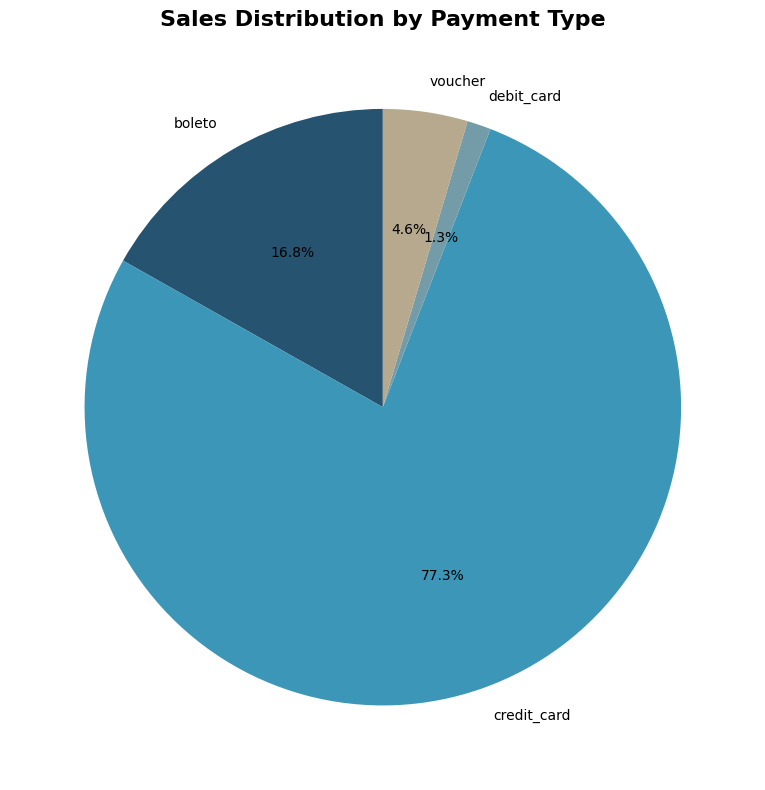

In [37]:
plt.figure(figsize=(8, 8))

sales_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Sales Distribution by Payment Type', fontsize=16, fontweight='bold')

plt.ylabel('')

plt.tight_layout()
plt.show()

# Pertanyaan 3:

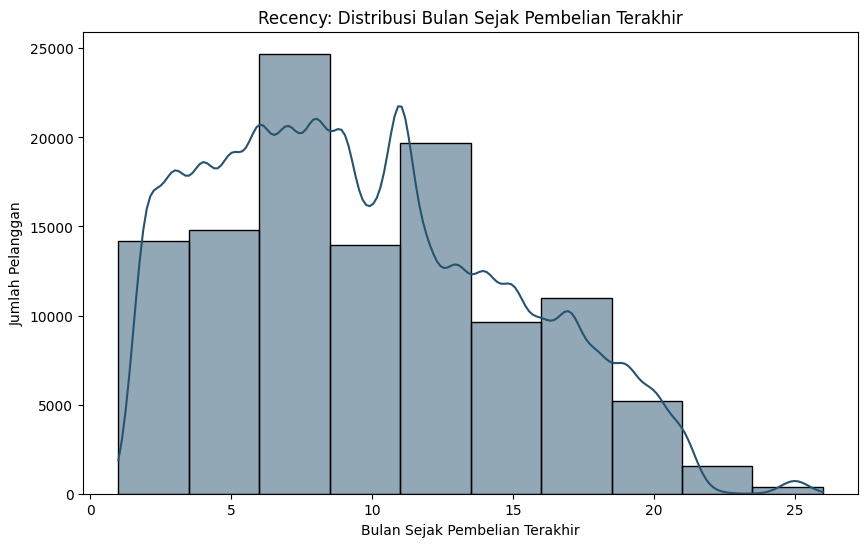

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df_all['month_last_purchase'], bins=10, kde=True)
plt.title('Recency: Distribusi Bulan Sejak Pembelian Terakhir')
plt.xlabel('Bulan Sejak Pembelian Terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Pertanyaan 4:

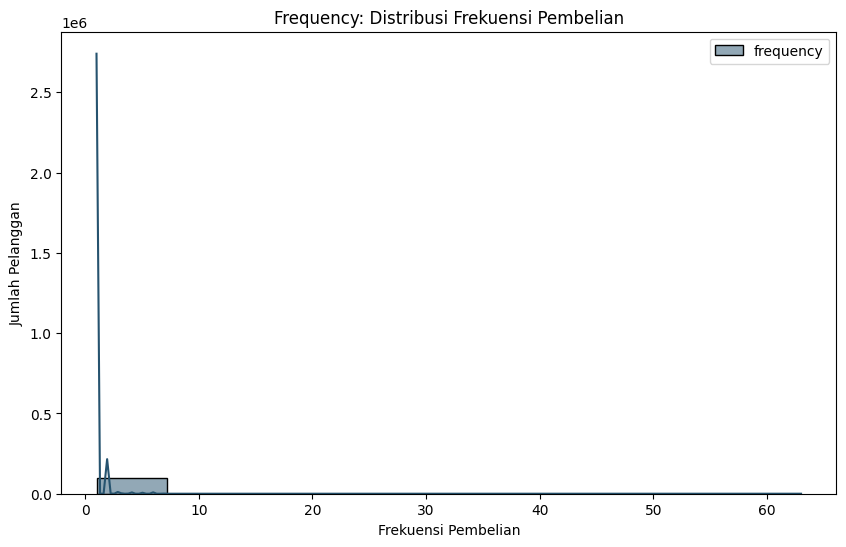

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(frequency, bins=10, kde=True)
plt.title('Frequency: Distribusi Frekuensi Pembelian')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Pertanyaan 5:

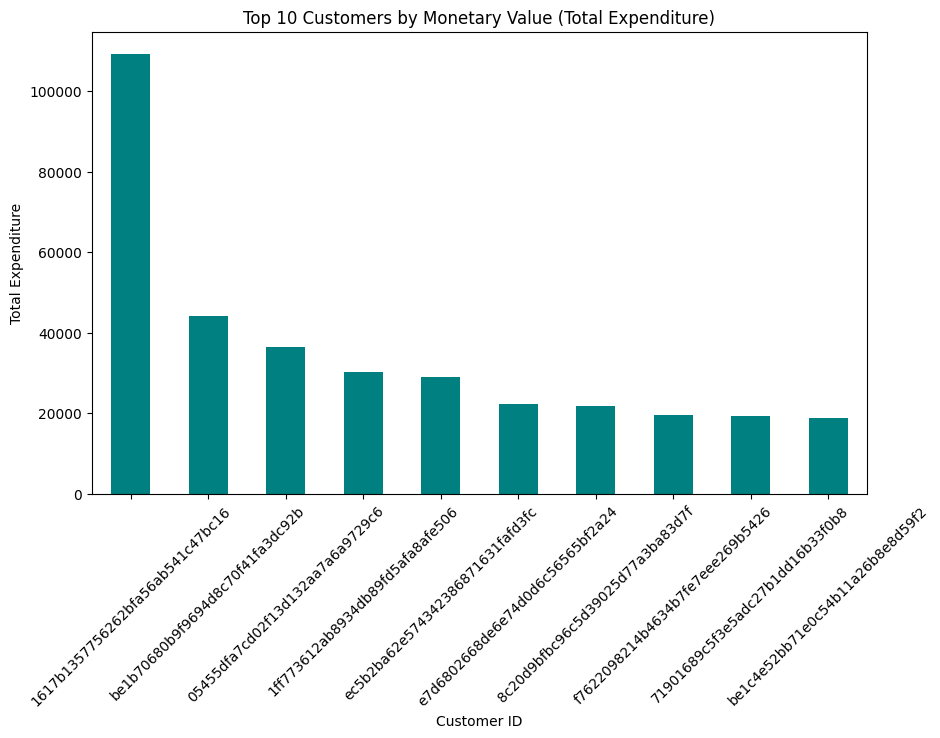

In [40]:
top_customers = monetary.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Monetary Value (Total Expenditure)')
plt.xlabel('Customer ID')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.show()

# MAP GEOLOCATION DISTRIBUTION

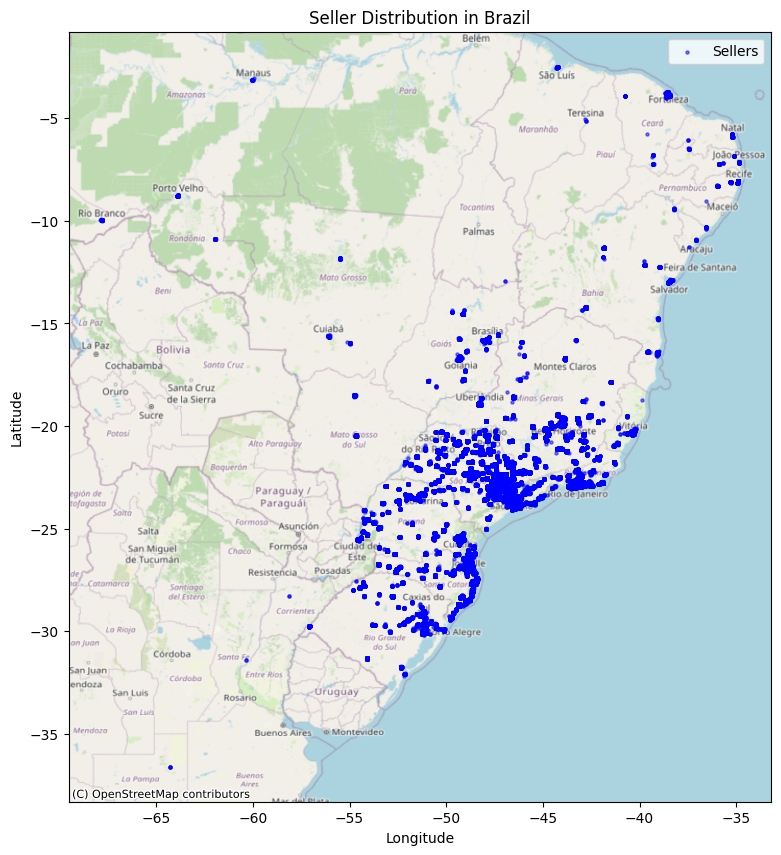

In [41]:
gdf_seller_locations = gpd.GeoDataFrame(
    df_seller_geolocation,
    geometry=gpd.points_from_xy(df_seller_geolocation['geolocation_lng'], df_seller_geolocation['geolocation_lat'])
)

gdf_seller_locations.crs = "EPSG:4326"

fig, ax = plt.subplots(figsize=(10, 10))

gdf_seller_locations.plot(ax=ax, color='blue', markersize=5, label='Sellers', alpha=0.5)

ctx.add_basemap(ax, crs=gdf_seller_locations.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Seller Distribution in Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Pertanyaan 6:

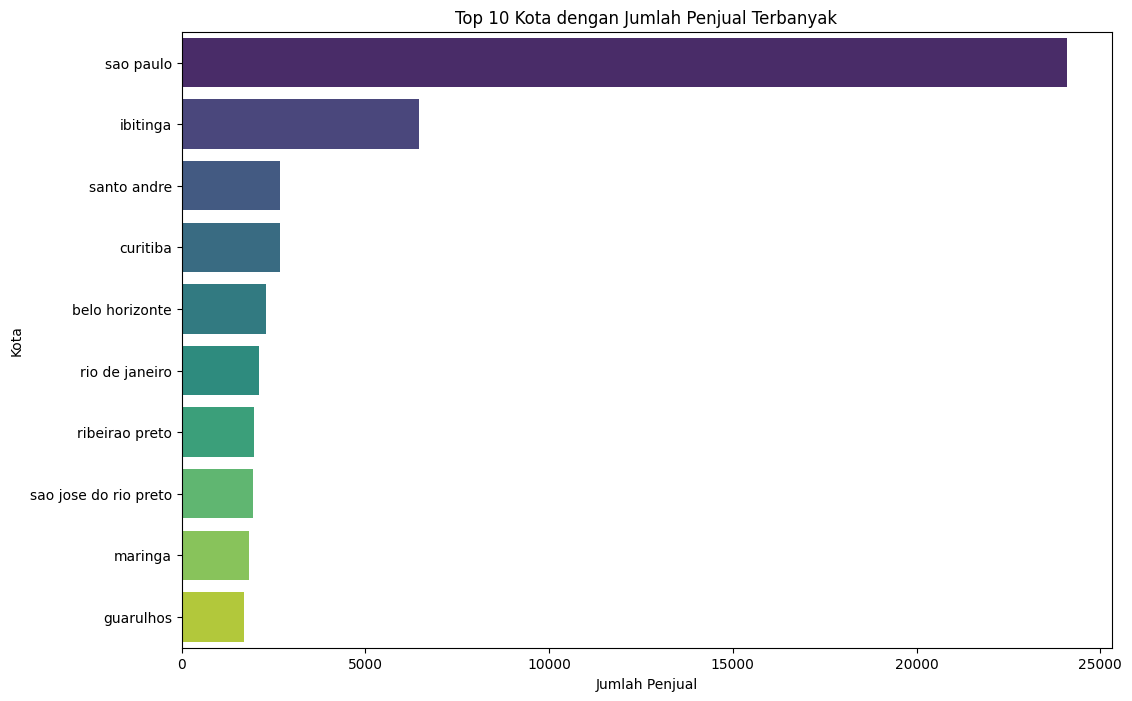

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='customer_id', y='seller_city', hue='seller_city', data=city_seller_counts.head(10), palette="viridis", dodge=False, legend=False)
plt.title('Top 10 Kota dengan Jumlah Penjual Terbanyak')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Kota')
plt.show()


# Pertanyaan 7:

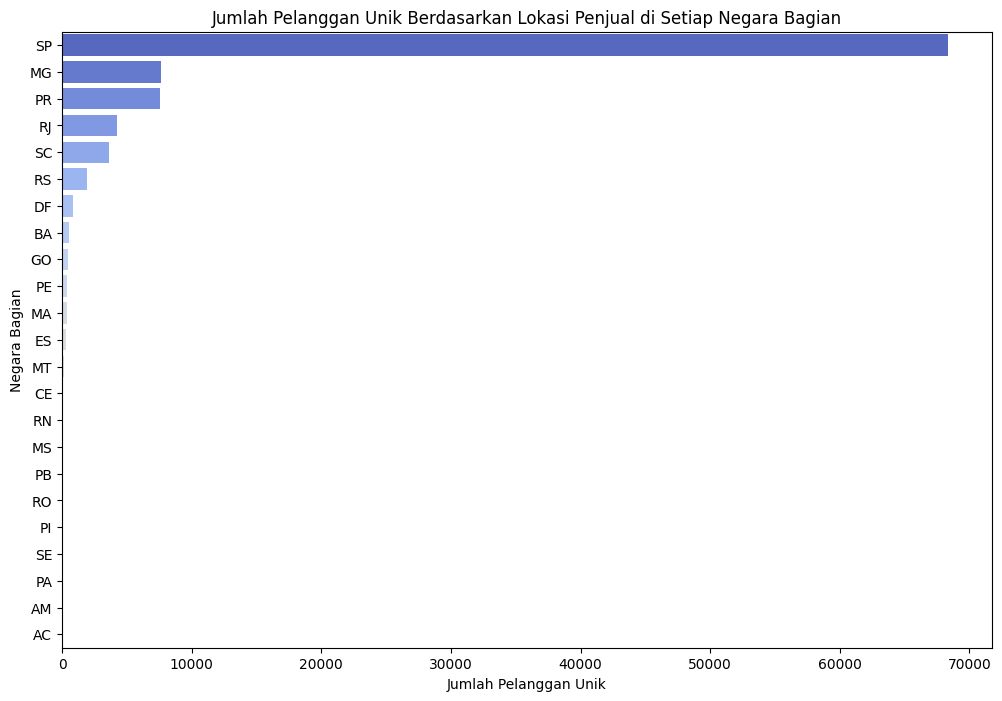

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='customer_id', y='seller_state', hue = "seller_state", data=state_customer_counts, palette="coolwarm")
plt.title('Jumlah Pelanggan Unik Berdasarkan Lokasi Penjual di Setiap Negara Bagian')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('Negara Bagian')
plt.show()

# Pertanyaan 8:

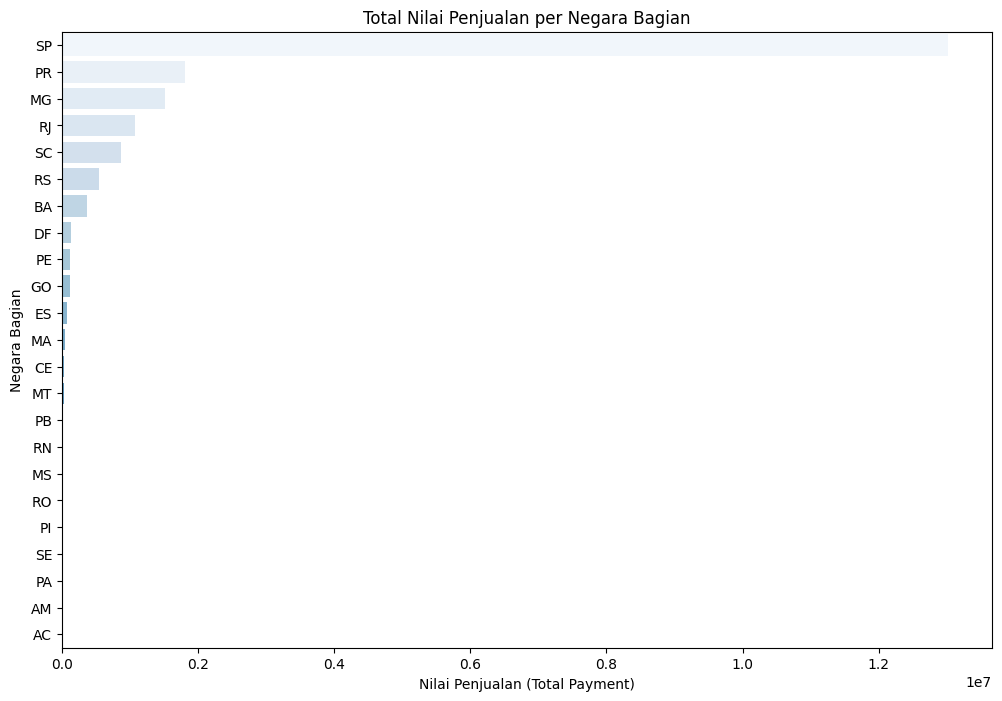

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x='payment_value', y='seller_state', hue = 'seller_state', data=state_sales, palette="Blues")
plt.title('Total Nilai Penjualan per Negara Bagian')
plt.xlabel('Nilai Penjualan (Total Payment)')
plt.ylabel('Negara Bagian')
plt.show()

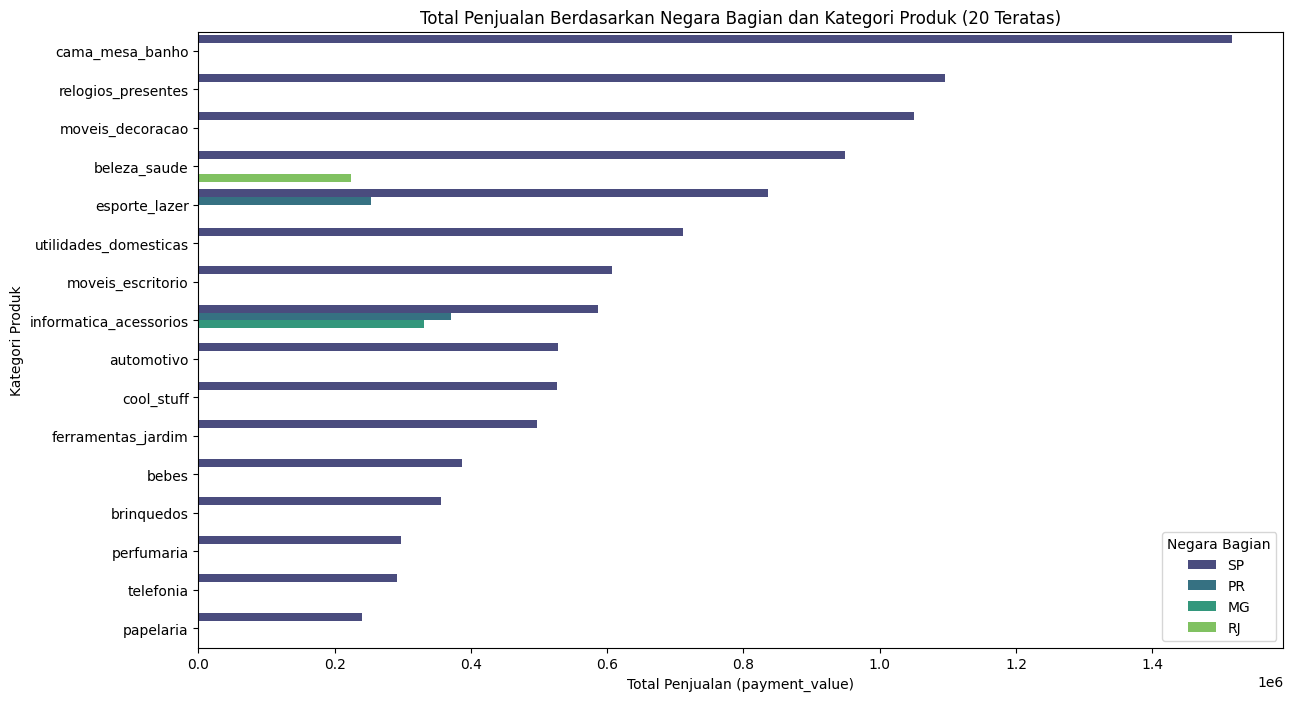

In [45]:
plt.figure(figsize=(14, 8))
sns.barplot(data=category_state_sales.head(20), x='payment_value', y='product_category_name', hue='seller_state', dodge=True, palette="viridis")
plt.title('Total Penjualan Berdasarkan Negara Bagian dan Kategori Produk (20 Teratas)')
plt.xlabel('Total Penjualan (payment_value)')
plt.ylabel('Kategori Produk')
plt.legend(title='Negara Bagian')
plt.show()

# Pertanyaan 9:

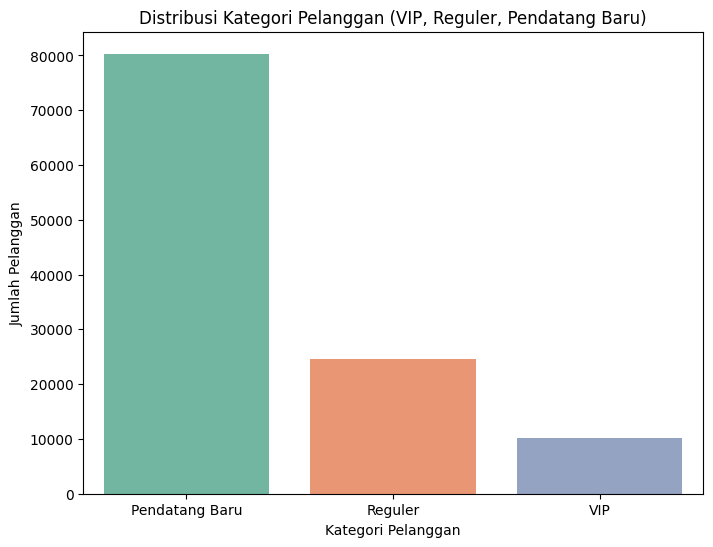

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', hue= 'category' ,data=df_all, palette="Set2")
plt.title('Distribusi Kategori Pelanggan (VIP, Reguler, Pendatang Baru)')
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Insight:**
- Diketahui bahwa bahwa penjualan bulanan mengalami penurunan linier dari agustus 2018 sampai septermber 2019 yang sebeum nya mengalami kenaikan signifikan
- Pembayaran yang dilakukan pelanggan paling banyak adalah credit card
- Pendatang baru paling banyak di bandingkan reguler dan VIP
- Negara bagian SP maupun Kota san paulo memiliki penjualan dan pelanggan unik terbanyak

## Analisis Lanjutan (Opsional)

# KORELASI FEATURE
melihat semua fitur yang saling berkorelasi dengan visualisasi heatmap

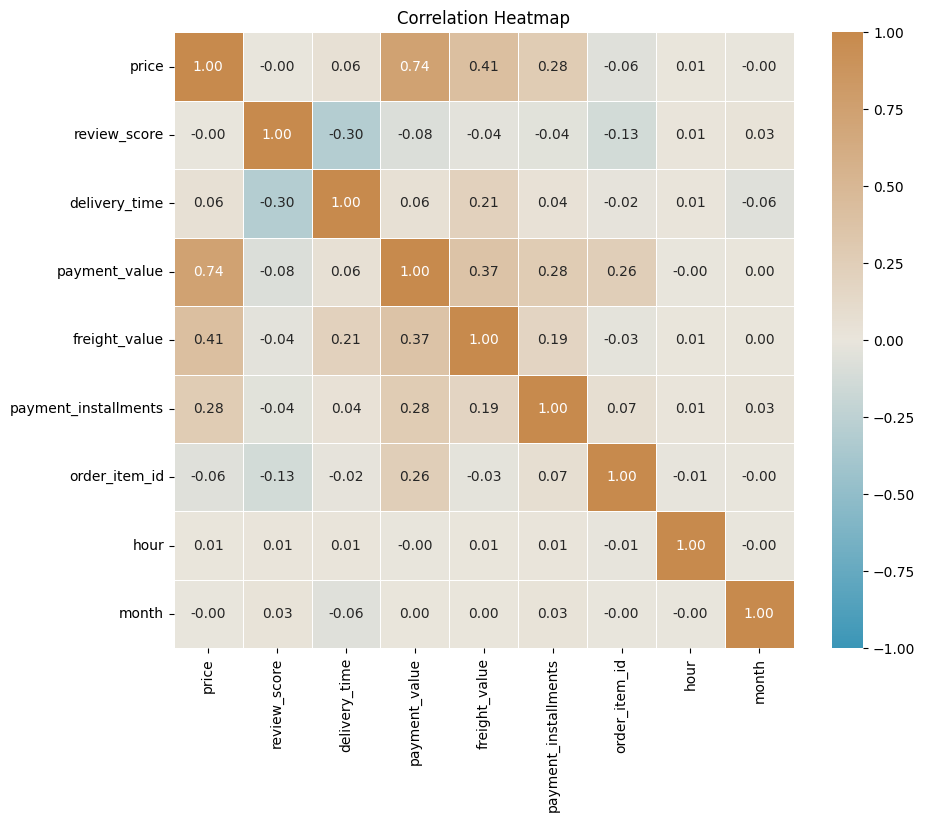

In [47]:
correlation_features = df_all[['price', 'review_score', 'delivery_time',
                            'payment_value', 'freight_value',
                            'payment_installments', 'order_item_id',
                            'hour', 'month']]


correlation = correlation_features.corr()


custom_colors = ['#3B96B7', '#E9E5DC', '#C78A4D']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# PERSIAPAN DASHBOARD
menyimpan (df_all) untuk pembuatan dashboard

In [48]:
filename = "all_data.csv"
df_all.to_csv("dashboard/" + filename, index=False)

## Conclusion

1. Conclution pertanyaan 1: Penjualan bulanan menunjukkan penurunan linier dari Agustus 2018 hingga September 2019, setelah sebelumnya mengalami kenaikan signifikan. Ini mengindikasikan kemungkinan perubahan dalam perilaku konsumen atau dampak eksternal yang perlu dianalisis lebih lanjut. Diperlukan upaya untuk mempromosikan produk atau layanan kepada pelanggan yang tidak aktif dalam waktu lama, terutama yang sudah tidak melakukan pembelian selama rata-rata 9 bulan.


2. Conclution pertanyaan 2: Mayoritas pembayaran dilakukan melalui kartu kredit, yang menunjukkan bahwa pelanggan mungkin lebih nyaman dengan metode pembayaran ini. Mempertimbangkan untuk menawarkan lebih banyak promosi atau insentif untuk metode pembayaran yang paling populer ini.
# ------------------Conclution RFM Analysis----------------------
3. Conclution pertanyaan 3: Rata-rata pelanggan tidak melakukan pembelian dalam 9 bulan terakhir, menunjukkan kebutuhan untuk merencanakan kampanye pemasaran yang menargetkan pelanggan yang telah lama tidak aktif.


4. Conclution pertanyaan 4: Pelanggan dengan frekuensi tinggi dan pengeluaran tinggi (frekuensi tertinggi adalah 63, total pengeluaran 483.96) memiliki potensi besar untuk meningkatkan revenue, dibandingkan dengan pelanggan yang jarang bertransaksi. Total pengeluaran dari 10 pelanggan teratas menunjukkan kontribusi signifikan terhadap revenue, menyoroti pentingnya fokus pada hubungan dengan pelanggan utama.

5. Conclution pertanyaan 5: Total pengeluaran dari 10 pelanggan teratas menunjukkan kontribusi signifikan terhadap revenue, menyoroti pentingnya fokus pada hubungan dengan pelanggan utama.

# ---------------Conclution Geolocation Analysis-----------
6.  Conclution pertanyaan 5: Sao Paulo mendominasi jumlah penjual, jauh melampaui kota-kota lain seperti Ibitinga, Santo Andre, Curitiba, Belo Horizonte, dan Rio de Janeiro. Ini menunjukkan bahwa Sao Paulo merupakan pusat utama bisnis atau penjualan untuk perusahaan ini, mungkin karena jumlah populasi atau infrastruktur yang mendukung. Perusahaan dapat mempertimbangkan strategi pemasaran dan dukungan yang lebih terfokus di wilayah Sao Paulo untuk memperkuat jaringan penjual. Selain itu, kota-kota dengan jumlah penjual yang tinggi juga bisa menjadi target untuk pengembangan pasar lebih lanjut.


7. Conclution pertanyaan 6: Pernyataan San Paulo merupakan tempat strategis juga didukung dengan jumlah pelaggan unik tertinggi secara signifikan di negara bagian SP (Sao Paulo) dibandingkan negara bagian lain. Dengan konsentrasi pelanggan unik yang tinggi di Sao Paulo, perusahaan dapat mempertimbangkan untuk fokus pada pengembangan dan peningkatan layanan di wilayah ini.


8. Conclution pertanyaan 7: Negara Bagian SP (Sao Paulo) menunjukkan total nilai penjualan yang jauh lebih tinggi dibandingkan negara bagian lainnya, menunjukkan dominasi pasar yang signifikan. Ini bisa menjadi indikasi tingginya aktivitas ekonomi dan daya beli konsumen di wilayah ini. Dengan dukungan informasi ini fokus pengembangan bisnis dan pemasaran bisa diarahkan ke Sao Paulo, mengingat potensi bisnis di Sao Paulo sangt tinggi. Negara bagian seperti Parana dan Minas Gerais juga dapat menjadi target untuk memperluas pasar, meskipun dengan prioritas yang lebih rendah dibandingkan Sao Paulo.

# -------------------Conclution Clustering Analysis------------------
9. Conclution pertanyaan 8: Mengelompokkan pelanggan ke dalam kategori seperti VIP, Reguler, dan Pendatang Baru membantu merancang strategi pemasaran yang lebih tepat dan terfokus untuk masing-masing kelompok.Kriteria pengelompokan yang relevan termasuk frekuensi pembelian, total pengeluaran, dan waktu sejak pembelian terakhir.
